#**Project Title : Eyes-Diseases-Detctor**

##**Problem Description**

Eye disease classification constitutes a research domain dedicated to developing algorithms and models for accurately categorizing various eye diseases based on medical imaging data. Its fundamental role lies in aiding ophthalmologists and healthcare professionals by facilitating precise diagnosis and treatment of eye conditions.

The principal aim of eye disease classification involves harnessing machine learning and computer vision techniques to scrutinize medical images and identify four key diseases: cataract, diabetic retinopathy, glaucoma, and normal conditions.

Cataract, a prevalent age-related eye ailment, is characterized by the clouding of the lens, resulting in blurred vision and visual impairment. Surgical intervention, wherein the cloudy lens is replaced with an artificial one, serves as an effective treatment, restoring clear vision and enhancing overall quality of life.

Diabetic retinopathy, a complication arising from diabetes, impacts the blood vessels in the retina and can lead to vision loss, including blurred or distorted vision, and, in severe cases, potential blindness. Early detection, regular eye examinations, and effective diabetes management are critical in preventing and managing this condition.

Glaucoma, a cluster of eye diseases, damages the optic nerve, often due to heightened fluid pressure in the eye. It manifests as gradual vision loss, starting with peripheral vision and potentially progressing to complete blindness. Timely diagnosis, treatment, and ongoing monitoring are imperative for preserving vision and preventing irreversible damage.

Concerning its applications, eye disease classification serves pivotal roles in various scenarios:

1.Screening and Early Detection:

Algorithms in eye disease classification function as screening tools to identify individuals at risk of developing eye diseases. Through the analysis of medical images, these models detect early signs of diseases such as diabetic retinopathy, age-related macular degeneration, and glaucoma, enabling timely intervention and treatment to potentially prevent vision loss.

2.Diagnosis Support:

Models in eye disease classification offer support to healthcare professionals, especially those with limited ophthalmic expertise, by aiding in accurate diagnoses. Through additional insights and suggestions based on image analysis, these models serve as decision support systems, enhancing the precision and efficiency of diagnoses.

3.Treatment Planning and Monitoring:

Post-diagnosis, eye disease classification algorithms play a crucial role in treatment planning and monitoring. By analyzing sequential imaging data, these models track disease progression, assess the effectiveness of treatments, and provide guidance for adjustments in treatment plans as necessary.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Additional import for Path class
from pathlib import Path


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eye-diseases-classification/dataset/glaucoma/1255_right.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/1482_left.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_398_8823411.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_309_4110303.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_13_697490.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_205_310538.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/Glaucoma_040.png
/kaggle/input/eye-diseases-classification/dataset/glaucoma/1256_right.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_221_3079640.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_392_9636183.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_12_5295071.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_399_7128170.jpg
/kaggle/input/eye-diseases-classification/dataset/glaucoma/_113_8738972.jpg
/kaggle/input/eye-disea

# Import each path of the image classes

In [ ]:
# import each path of the image classes
glaucoma = Path('/kaggle/input/eye-diseases-classification/dataset/glaucoma')
cataract = Path('/kaggle/input/eye-diseases-classification/dataset/cataract')
normal = Path('/kaggle/input/eye-diseases-classification/dataset/normal')
diabetic_retinopathy = Path('/kaggle/input/eye-diseases-classification/dataset/diabetic_retinopathy')

# Create a dataframe with the file path and the labels


In [ ]:
# create a dataframe with the file path and the labels
disease_type = [glaucoma, cataract, normal, diabetic_retinopathy]
df = pd.DataFrame()
from tqdm import tqdm
for types in disease_type:
    for imagepath in tqdm(list(types.iterdir()), desc=str(types)):
        df = pd.concat([df, pd.DataFrame({'image': [str(imagepath)], 'disease_type': [disease_type.index(types)]})], ignore_index=True)

/kaggle/input/eye-diseases-classification/dataset/glaucoma: 100%|██████████| 1007/1007 [00:00<00:00, 2025.92it/s]
/kaggle/input/eye-diseases-classification/dataset/cataract: 100%|██████████| 1038/1038 [00:00<00:00, 1715.70it/s]
/kaggle/input/eye-diseases-classification/dataset/normal: 100%|██████████| 1074/1074 [00:00<00:00, 1854.14it/s]
/kaggle/input/eye-diseases-classification/dataset/diabetic_retinopathy: 100%|██████████| 1098/1098 [00:00<00:00, 1959.18it/s]


# Import Library

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization
import cv2
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
import PIL
import os
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Data Preprocessing

In [ ]:
df

,image,disease_type
0,/kaggle/input/eye-diseases-classification/data...,0
1,/kaggle/input/eye-diseases-classification/data...,0
2,/kaggle/input/eye-diseases-classification/data...,0
3,/kaggle/input/eye-diseases-classification/data...,0
4,/kaggle/input/eye-diseases-classification/data...,0
...,...,...
4212,/kaggle/input/eye-diseases-classification/data...,3
4213,/kaggle/input/eye-diseases-classification/data...,3
4214,/kaggle/input/eye-diseases-classification/data...,3
4215,/kaggle/input/eye-diseases-classification/data...,3


In [ ]:
# check the count of the target label
df.disease_type.value_counts()

disease_type
3    1098
2    1074
1    1038
0    1007
Name: count, dtype: int64

In [ ]:
# define function to plot sample images
def plot_image(n, num_samples=3):
    disease_labels = ['glaucoma', 'cataract', 'normal', 'diabetic_retinopathy']
    images = df[df['disease_type'] == n].sample(num_samples)['image']

    plt.figure(figsize=(12, 12))

    for i, path in enumerate(images, 1):
        img = (plt.imread(path) - plt.imread(path).min()) / plt.imread(path).max()
        plt.subplot(3, 3, i)
        plt.imshow(img)
        plt.axis('off')
        plt.title(disease_labels[n])

    plt.show()

# Load and Preprocess Images

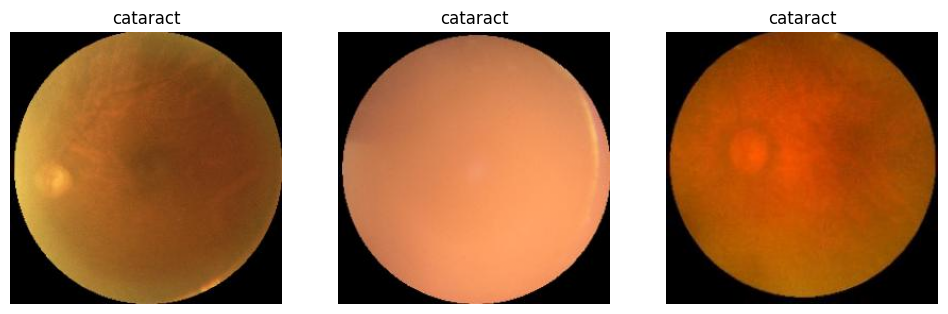

In [ ]:
plot_image(1)

# Initialize data and labels lists


In [ ]:
# Initialize data and labels lists
data = []
labels = []

In [ ]:
dataset_path = "/kaggle/input/eye-diseases-classification/dataset"

# Load images and labels from the dataset

In [ ]:
# Load images and labels from the dataset
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
        image = cv2.resize(image, (224, 224))  # Resize to fit MobileNetV2 input size
        data.append(image)
        labels.append(category)

In [ ]:
# Convert data and labels to NumPy arrays
data = np.array(data) / 255.0  # Normalize pixel values

In [ ]:
# Perform label encoding
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [ ]:
# Perform one-hot encoding on the labels
labels = to_categorical(labels)

# Split the data into training and testing sets

In [ ]:
# Split the data into training and testing sets
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

# Create an image data generator with data augmentation

In [ ]:
# Create an image data generator with data augmentation
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [ ]:
# Load MobileNetV2 pre-trained on ImageNet without the top layer
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

In [ ]:
# Construct the head of the model that will be placed on top of the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(4, activation="softmax")(headModel)  # Adjust based on the number of classes

In [ ]:
# Combine the base model and the head model
model = Model(inputs=baseModel.input, outputs=headModel)

# Compile the model with the new learning

In [ ]:
# Compile the model with the new learning rate scheduling
INIT_LR = 1e-4
EPOCHS = 30
BS = 32

In [ ]:
# Use ExponentialDecay for learning rate scheduling
lr_schedule = ExponentialDecay(initial_learning_rate=INIT_LR, decay_steps=100000, decay_rate=0.96, staircase=True)
opt = Adam(learning_rate=lr_schedule)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Train the Model

In [ ]:
# Train the model
history = model.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS
)

Epoch 1/30
105/105 [==============================] - 60s 324ms/step - loss: 0.3296 - accuracy: 0.8818 - val_loss: 4.1915 - val_accuracy: 0.4028
Epoch 2/30
105/105 [==============================] - 34s 319ms/step - loss: 0.2719 - accuracy: 0.9051 - val_loss: 4.6076 - val_accuracy: 0.4479
Epoch 3/30
105/105 [==============================] - 34s 319ms/step - loss: 0.2560 - accuracy: 0.9048 - val_loss: 4.5028 - val_accuracy: 0.4408
Epoch 4/30
105/105 [==============================] - 34s 322ms/step - loss: 0.2044 - accuracy: 0.9255 - val_loss: 3.6724 - val_accuracy: 0.4656
Epoch 5/30
105/105 [==============================] - 34s 323ms/step - loss: 0.1936 - accuracy: 0.9309 - val_loss: 3.1904 - val_accuracy: 0.5107
Epoch 6/30
105/105 [==============================] - 34s 322ms/step - loss: 0.1863 - accuracy: 0.9294 - val_loss: 2.3705 - val_accuracy: 0.5770
Epoch 7/30
105/105 [==============================] - 34s 319ms/step - loss: 0.1611 - accuracy: 0.9443 - val_loss: 3.1289 - val_ac

# Evaluate the Model

In [ ]:
# Evaluate the model
predIdxs = model.predict(testX, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)

27/27 [==============================] - 1s 30ms/step


In [ ]:
# Map numerical labels back to disease names
disease_names = {0: 'cataract', 1: 'diabetic_retinopathy', 2: 'glaucoma', 3: 'normal'}
pred_disease_names = [disease_names[label] for label in predIdxs]

# Display classification report

In [ ]:
# Evaluate the model
predIdxs = model.predict(testX, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs))

27/27 [==============================] - 1s 29ms/step
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       208
           1       0.96      0.98      0.97       220
           2       0.91      0.86      0.88       201
           3       0.89      0.80      0.85       215

    accuracy                           0.90       844
   macro avg       0.90      0.90      0.90       844
weighted avg       0.90      0.90      0.90       844

